In [29]:
import pandas as pd

# read data
data = pd.read_csv("data_clean.csv")

In [30]:
import re

counter = 0

relationship = {}
rela = data["participant_relationship"]

# iterate over relationships
for item in rela:
    # check if item is not NaN
    if pd.isna(item) == False:
        # split item on |
        item = re.split("[|]+", item)
        # iterate over splitted item
        for element in item:
            # replace :: with : because of weird thing in dataset
            element = element.replace("::", ":")
            # remove number and : from element
            element = element.split(':')[-1]
            # record in dictionary how often relationship occurs
            if element in relationship:
                relationship[element] += 1
            else:
                relationship[element] = 1
            
for item in relationship:
    print(item, relationship[item])

Family 3551
Friends 1091
Significant others - current or former 3465
Armed Robbery 7964
Neighbor 726
Home Invasion - Perp Does Not Know Victim 1374
Home Invasion - Perp Knows Victim 525
Aquaintance 1019
Gang vs Gang 587
Drive by - Random victims 43
Co-worker 139
Mass shooting - Perp Knows Victims 12
Mass shooting - Random victims 8


In [21]:
# log every item in amount of relationships
for item in relationship:
    relationship[item] = math.log10(relationship[item])
    
data = {'Relationships': relationship}

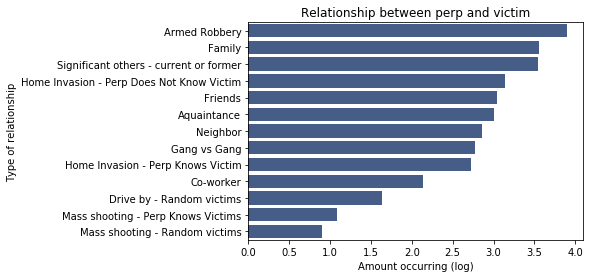

In [27]:
import seaborn as sns
import math
import matplotlib.pyplot as plt

df_data = pd.DataFrame(data).sort_values('Relationships', ascending=False)
fig = sns.barplot(x='Relationships', y=df_data.index, data=df_data, color=sns.xkcd_rgb["denim blue"])
plt.xlabel('Amount occurring (log)')
plt.ylabel('Type of relationship')
plt.title('Relationship between perp and victim')
plt.show(fig)